<a href="https://colab.research.google.com/github/jmarlon/paleofiredb/blob/main/fire_curvegen_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

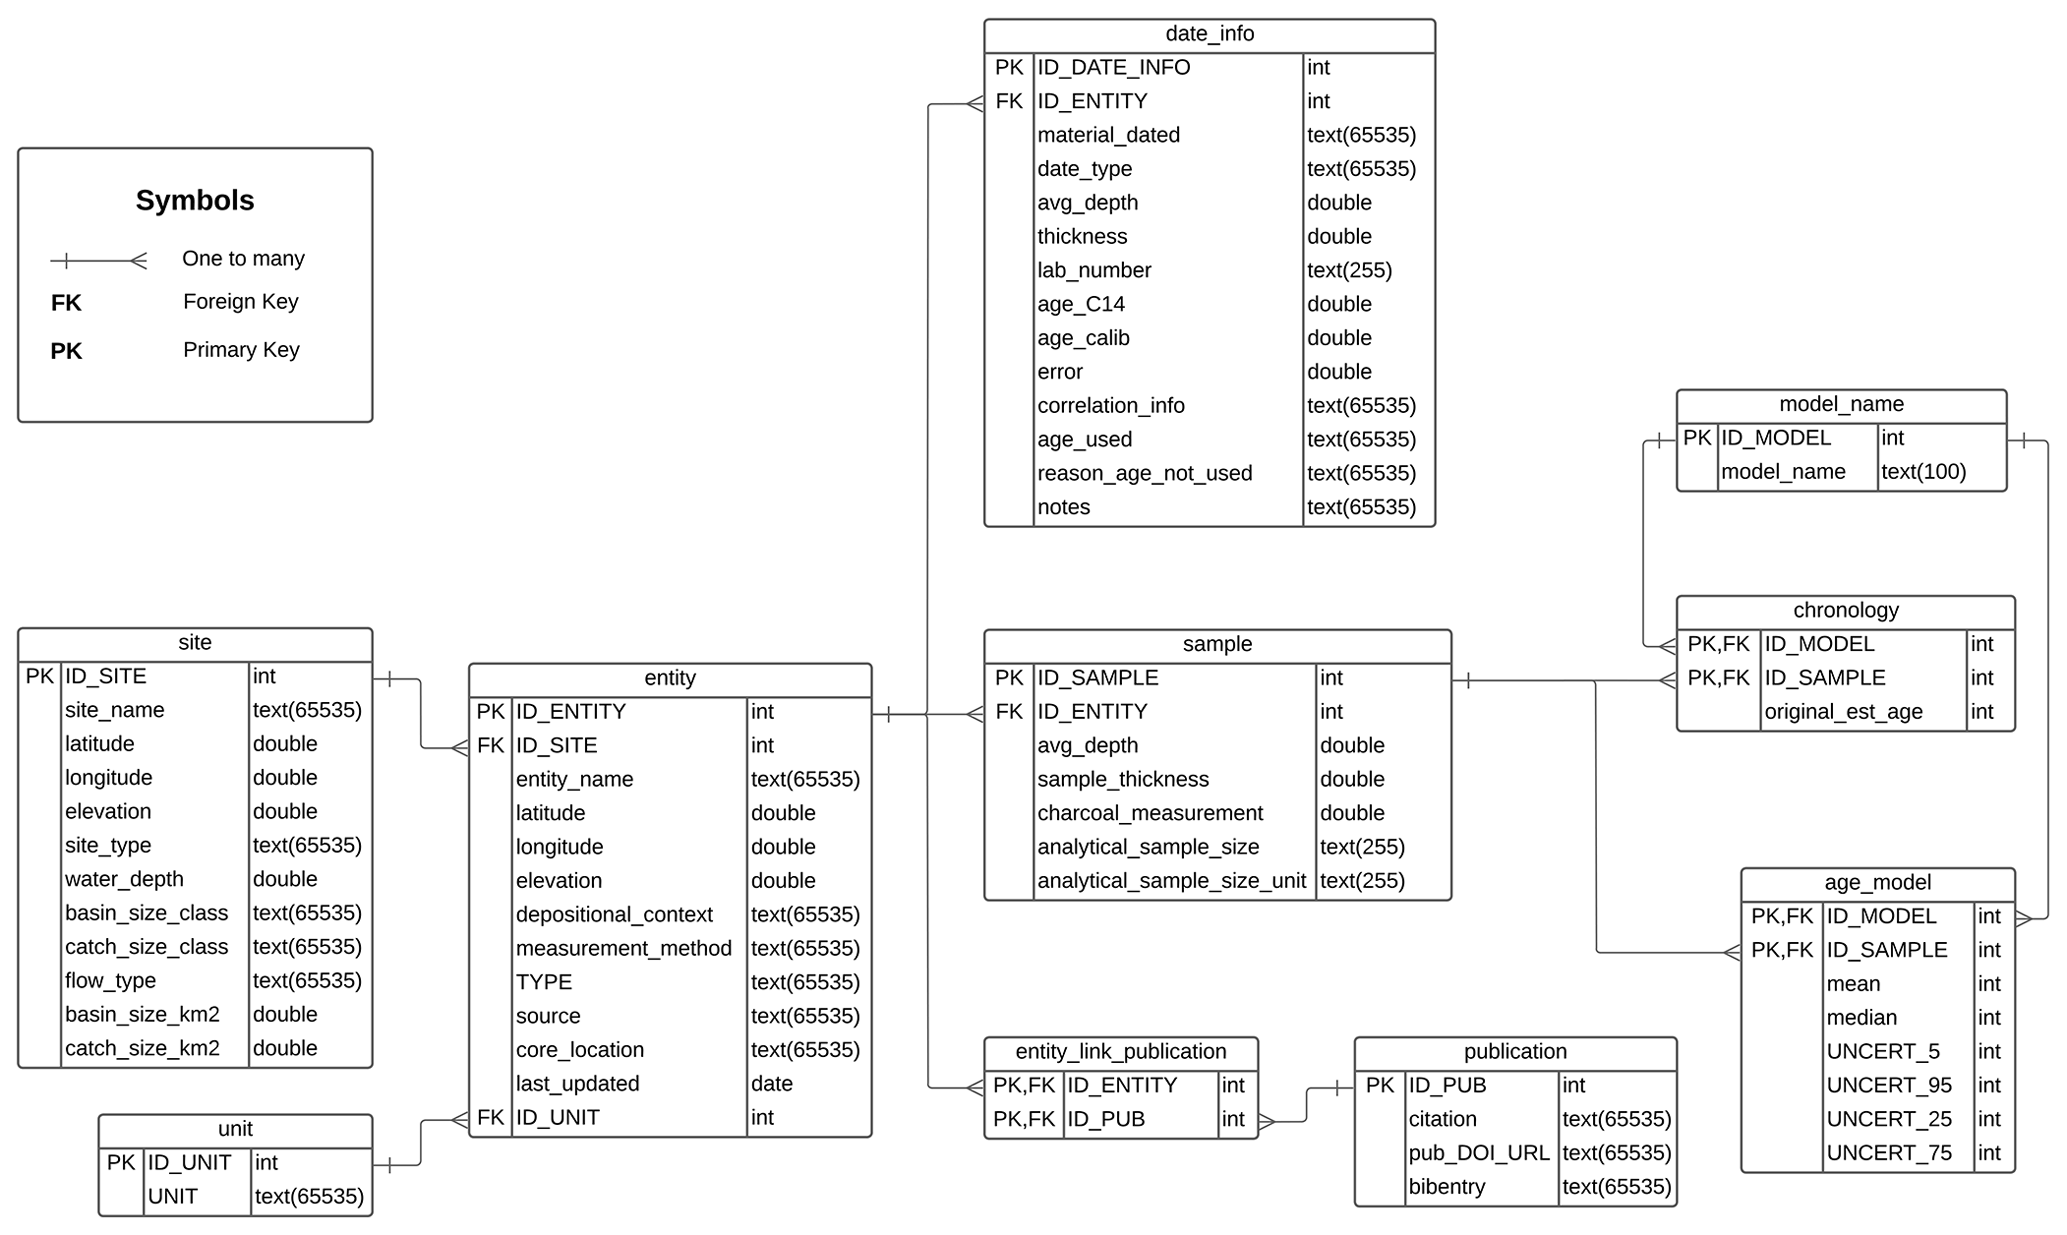

In [45]:
# Install necessary libraries

install.packages("bigrquery") # Install the bigrquery package
library(bigrquery) # Load the bigrquery package
library(DBI) # Load the DBI package (this package is what was used in original RPD scripts)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [47]:
# Connect to the rpd database through google bigquery

# BigQuery DB is here: https://console.cloud.google.com/bigquery?project=fire-data-research
con <- dbConnect(
  bigrquery::bigquery(),
  project = "fire-data-research",
  dataset = "rpd"
)

In [102]:
# Create chronplot for the first sample in the first entity as a test
# A chronplot is a plot of [sample ages] v [sample charcoal measurements] for an entity

# get charcoal measurements and ages every sample in entity 1
# Store it in a dataframe to plot later
query <- "SELECT charcoal_measurement, original_est_age FROM chronology INNER JOIN sample ON sample.ID_SAMPLE = chronology.ID_SAMPLE WHERE ID_ENTITY = 1"
entity1_chronplot_points <- dbGetQuery(con, query)

# Reorder/sort the dataframe so that the points in the plot are linked in order
sorted_indices <- order(entity1_chronplot_points$original_est_age)
entity1_chronplot_points <- entity1_chronplot_points[sorted_indices, ]


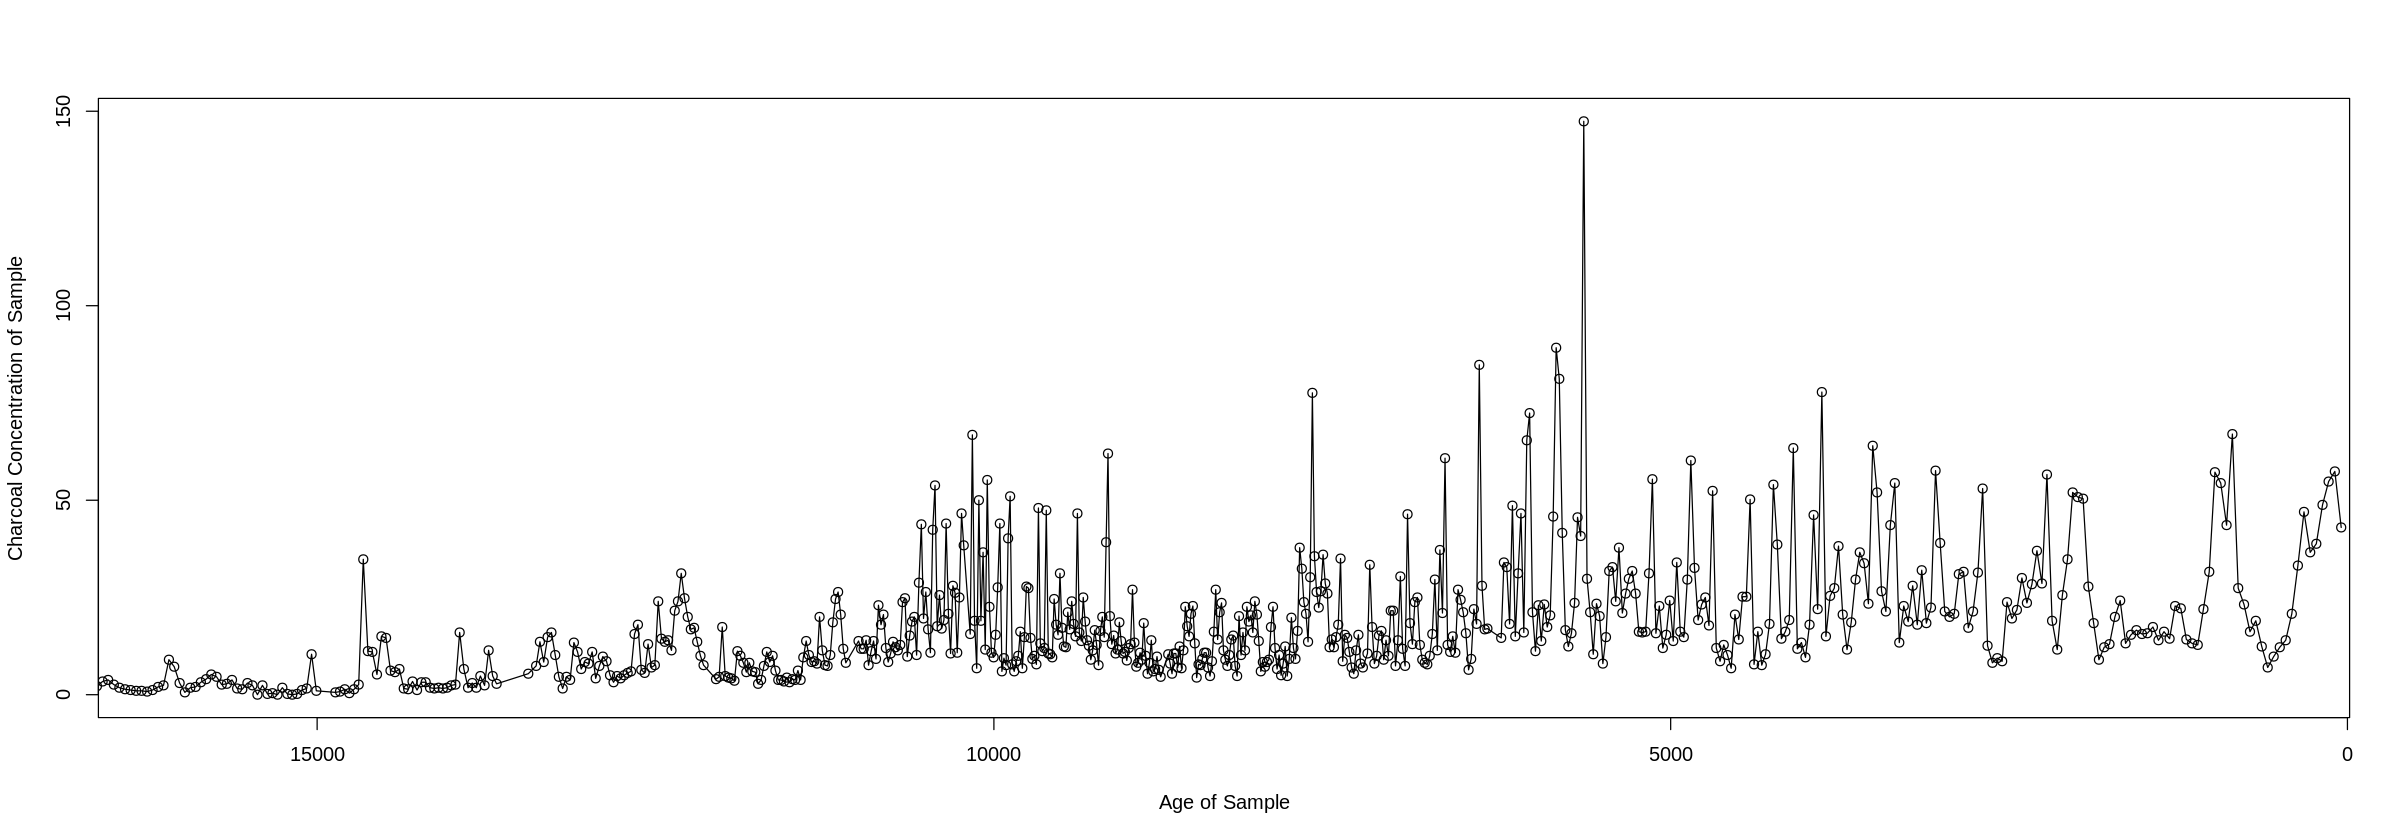

In [104]:
# Display chronplot

options(repr.plot.width = 20)  # Adjusting width of the plot in colab so we can see more detail

plot(entity1_chronplot_points$original_est_age, entity1_chronplot_points$charcoal_measurement,
        xlim = c(16000, 600), type = 'o', xlab = "Age of Sample", ylab = "Charcoal Concentration of Sample")

TODO: Replicate the other 2 graphs in the chronplot pdf. (depth vs age and global coordinate map of entity)